## Functional Health Literacy on Treatment Adherence among Type 2 Diabetic Clients - Using SAS
By Alfeo Sabay

### 1) Cross-Sectional Analysis - Functional Health Literacy on Treatment Adherence among Type 2 Diabetic Clients
This observational study is strictly cross-sectional in nature. As such, its main goal is to examine and analyze a cross-sectional snapshot of type 2 diabetic clients' functional health literacy and its relationship to adherence to medical treatment. Sample data is non-randomized and observational survey data therefore it is important to state that only summary statistics and correlational techniques are applied in order to understand the relationship if any of literacy to adherence. As such it does not reveal evidence of causation nor can it infer statistics to a general population of type 2 diabetic patients, but rather reveal the relative contribution (correlation) if any of the patient's functional literacy to adherence 
(see - https://pdfs.semanticscholar.org/d886/674ab022d6d34447320ed62b96ebab9ead60.pdf).

### 2) Data Preparation For Data Analysis for Functional Health Literacy on Treatment Adherence among Type 2 Diabetic Clients
Survey data was gathered using two tools from 276 Diabetic Clients. The NVS (Newest Vital Sign) tool produced a literacy score ranging from zero to six (0 with the lowest literacy to 6 with the highest literacy) from a series of survey questions presented to the Diabetic Client. Similarly, the BMQ (Brief Medical Questionaire) tool derived a score in the range of zero to eleven (0 as most adherent and 11 as least adherent) relfecting the patient's adherence to treatment from a questionaire. Thus the focus of the study is on two variables; Literacy and Adherence.

To prepare this data for Cross-sectional Analytics, recoding was necessary. The BMQ scoring range was in an inverse direction as compared to the NVS scoring range. A low magnitude in the NVS score means low literacy while a low magnitude in the BMQ score means full adherence. In order to match the direction of scoring magnitude and significance, the BMQ scores were reversed to reflect least adherence at zero and full adherence at 11 using the formula |y-11|. The prepared dataset is illustrated below.


In [32]:
/*
Data Analysis for Functional Health Literacy on Treatment Adherence among Type 2 Diabetic Clients using Pearson Correlation.
Author: Alfeo Sabay
*/
DATA adh;
	INFILE "/folders/myfolders/adherence/adherence_recoded-2.csv" firstobs=2;
	INPUT @;
	literacy=SCAN(_INFILE_, 19, ',');
	adherence=SCAN(_INFILE_, 26, ',');
	conv_lit=INPUT(literacy, 4.);
	conv_adh=INPUT(adherence, 4.);
	DROP literacy;
	DROP adherence;
	RENAME conv_lit=literacy;
	RENAME conv_adh=adherence;
RUN;
/*
PROC PRINT DATA=adh;
RUN;
*/

### 3.a) Exploratory Data Analysis - Scatterplot
An easy way to understand the relationship of literacy to adherence is to plot the data points in a scatterplot as shown below. A scatterplot can reveal a positive, negative or no relationship between two variables by the way it renders on the plot. A positive relationship appears as an upsloping linear pattern of the dots while a negative relationship appears as a downsloping pattern of the dots and a straight horizontal line indicantes no relationship. When there is no obvious pattern, this can be an indication of random noise in the data or lack of relationship between the two variables.

In the scatterplot below, there is no obvious pattern (see scatter plot below using PROC SGSCATTER). However, when a linear regression fit plot (see Fit Plots using PROC SGPLOT with linear fit option) is drawn on the scatter points, in both cases regardless of the order of variables whether literacy vs adherence or adherence vs literacy, the fitted regression line is a near straight horizontal line with a miniscule negative slope. This is visual evidence of very weak or no relationship between the 2 variables literacy and adherence.


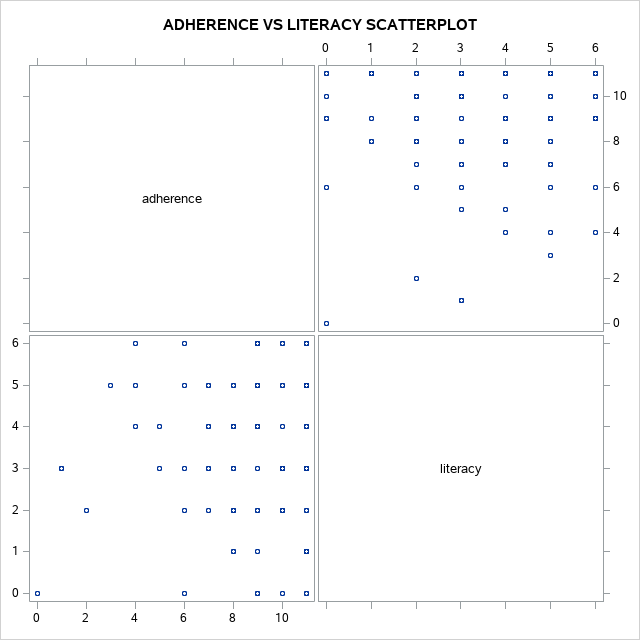
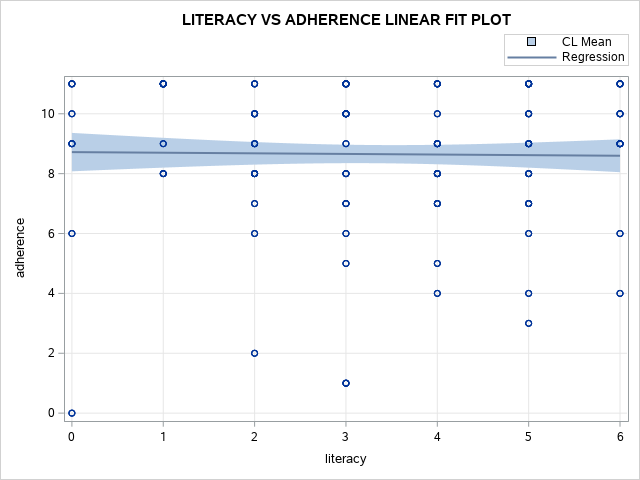
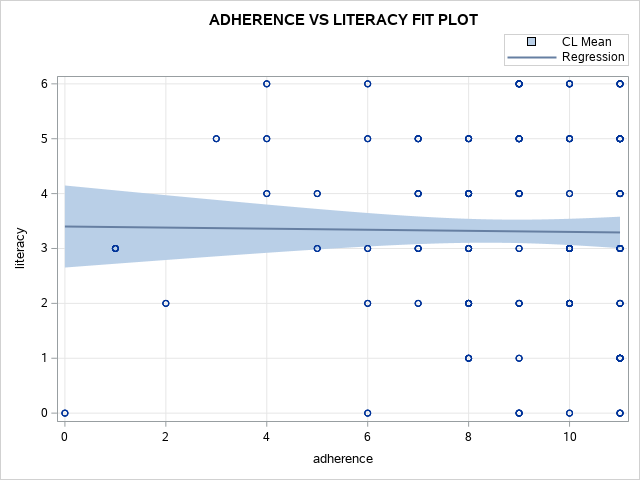

In [49]:
/*
PROC PRINT DATA=adh;
RUN;

PROC CONTENTS DATA=adh;
RUN;

*/

/* Exploratory Data Analysis Section */

TITLE "ADHERENCE VS LITERACY SCATTERPLOT";
PROC SGSCATTER DATA=adh;
	MATRIX adherence literacy;
RUN;



proc sgplot data=adh;
  reg x=literacy y=adherence / degree=1 clm='CL Mean'; 

  /* position the legend inside the top-right corner of the plot area */
  keylegend / location=outside position=topright across=1;

  /* show grid lines on both axes */
  xaxis grid;
  yaxis grid;
  TITLE "LITERACY VS ADHERENCE LINEAR FIT PLOT";
run;

proc sgplot data=adh;
  reg x=adherence y=literacy / degree=1 clm='CL Mean'; 

  /* position the legend inside the top-right corner of the plot area */
  keylegend / location=outside position=topright across=1;

  /* show grid lines on both axes */
  xaxis grid;
  yaxis grid;
  TITLE "ADHERENCE VS LITERACY FIT PLOT";
run;

### 3.b) Summary Statistics
The SAS Means Procedure below summarizes statistics of the literacy at each level of adherence and at leach level of literacy. While this study considers full adherence (0 in BMQ recoded to 11 for SAS Analysis) as "adherent" and scores below full adherence as non-adherent, it is important to examine the spread or standard deviation and frequencies of literacy levels for each adherence level and vice versa. 

If we consider level 11 to be fully adherent (according to the BMQ tool scores), and levels 10 and below to be partially or non-adherent, it can be calculated that the percentage of adherent patients to be **30.4% ((84/276) x 100)** while non-adherent prevalence (percentage of the sum from levels 10 down to 0) as **69.6% ((192/276) x 100)**. 

From the SUMMARY STATISTICS FOR ADHERENCE GROUPING table, the pattern of frequency (N obs - number of observations) begins to increase at adherence level 6 with 15 observations with literacy ranging from 0 to 6 (std deviation 2.2) and progressively more observations are seen at the upper levels of adherence. This pattern can seen in the HISTOGRAM FOR ADHERENCE.

It is also important to note that as the number of observations (N obs) from adherence level 4 to level 11 increase, the standard deviation also increases meaning there is a larger spread from the minimum literacy of 0 to 6 observed beginning at adherence level 9. This widening min max range reveals that there exists a full range of least literate to most literate at the upper levels of adherence and is the initial indication that there is a weak relationship between literacy and adherence (see histogram grouped by adherence).

From the SUMMARY STATISTICS FOR LITERACY GROUPING table, the number of observations (N obs) almost resembles a normal distribution as can be seen in the HISTOGRAM FOR LITERACY. The pattern for standard deviation and mean appear to be even as can be seen in the MEAN OR AVERAGE ADHERENCE BY LITERACY bar chart below. This is an indication of a weak relationship between literacy and adherence since we can see that the mean or average adherence level for all literacy levels (groupings) are nearly the same.

These results can also be seen visually in the Box Plots below.



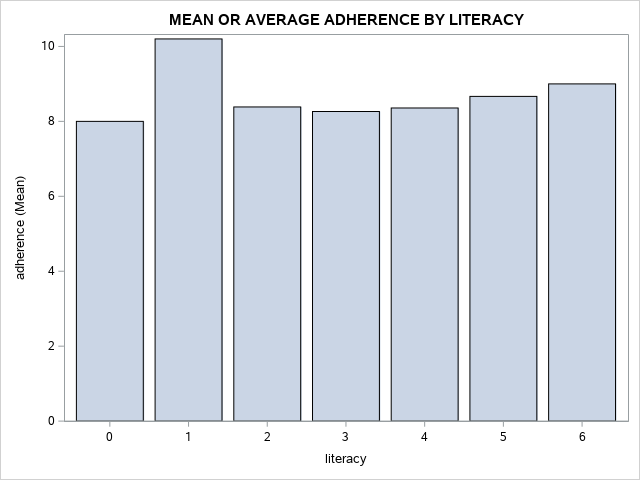
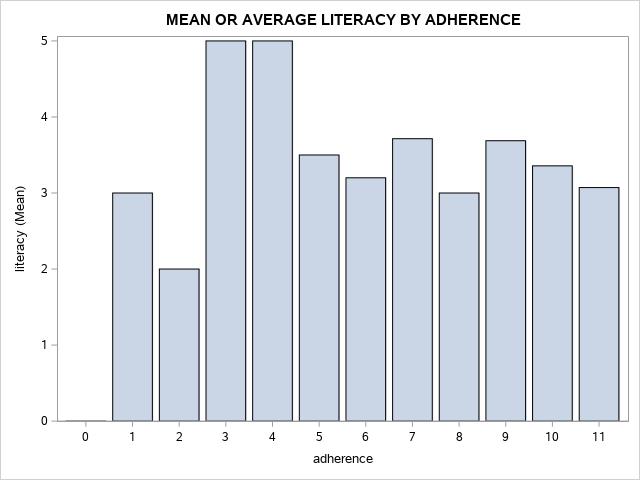
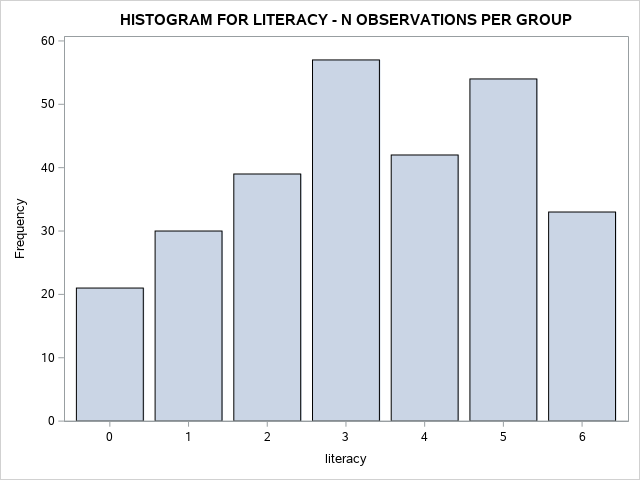
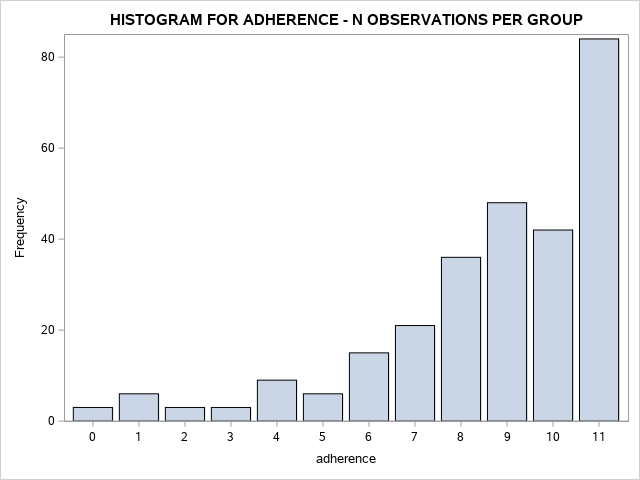
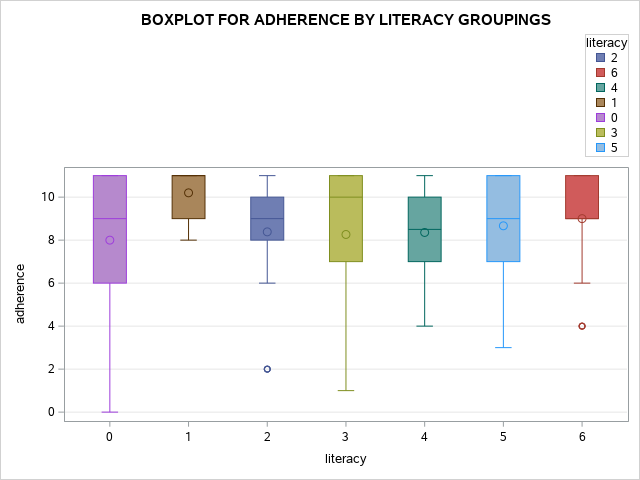
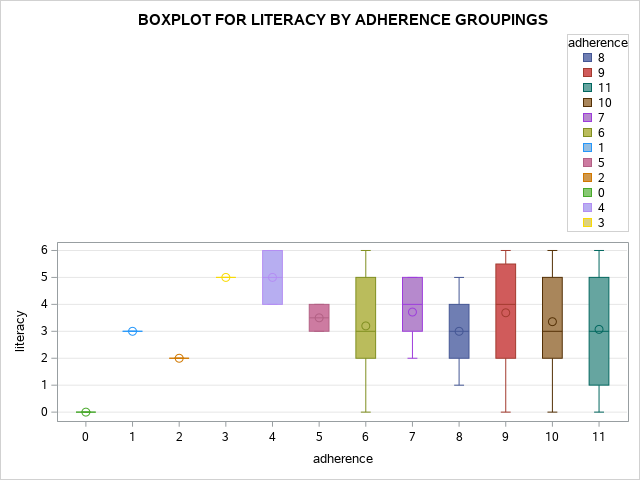

In [42]:
/* Summary Statistics */
TITLE "SUMMARY STATISTICS FOR ADHERENCE GROUPING";
PROC MEANS DATA=adh;
	CLASS adherence;
	VAR literacy;
RUN;

TITLE "SUMMARY STATISTICS FOR LITERACY GROUPING";
PROC MEANS DATA=adh;
	CLASS literacy;
	VAR adherence;
RUN;

/*
PROC UNIVARIATE DATA=adh plots;
	CLASS adherence;
	VAR literacy;
RUN;
*/
/* Bar Plots */
TITLE 'MEAN OR AVERAGE ADHERENCE BY LITERACY';
PROC SGPLOT DATA=adh;
  VBAR literacy / response=adherence stat=mean;
run;

TITLE 'MEAN OR AVERAGE LITERACY BY ADHERENCE';
PROC SGPLOT DATA=adh;
  VBAR adherence / response=literacy stat=mean;
run;

PROC SGPLOT data=adh;
    vbar literacy;
    TITLE "HISTOGRAM FOR LITERACY - N OBSERVATIONS PER GROUP";
run;

PROC SGPLOT data=adh;
    vbar adherence;
    TITLE "HISTOGRAM FOR ADHERENCE - N OBSERVATIONS PER GROUP";
run;

/* Box plots */
proc sgplot data=adh;
  vbox adherence / category=literacy group=literacy
    lineattrs=(pattern=solid) whiskerattrs=(pattern=solid); 
  yaxis grid;
  keylegend / location=outside position=topright across=1;
  TITLE "BOXPLOT FOR ADHERENCE BY LITERACY GROUPINGS";
run;

proc sgplot data=adh;
  vbox literacy / category=adherence group=adherence
    lineattrs=(pattern=solid) whiskerattrs=(pattern=solid); 
  yaxis grid;
  keylegend / location=outside position=topright across=1;
  TITLE "BOXPLOT FOR LITERACY BY ADHERENCE GROUPINGS";
run;



### 4) Pearson Product-Moment Correlation Analysis
The correlation analysis is done using SAS PROC CORR Procedure to measure the relative strength and direction of the correlation between the literacy and adherence variables. The Pearson-Product Moment is implemented by PROC CORR using the formula below to calculate $\rho$ (Rho). $\rho$ values range from -1 to +1 with midpoint 0 indicating no correlation and -1 correlation indicating full inverse correlation and +1 indicating full positive correlation. The implementation of the Pearson-Product Moment algorithm uses the formula below where x is the variable for literacy and y is the variable for adherence. n is the number of samples.


\begin{equation*}
\rho = \frac{\sum_{i=1}^n \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)}{n - 1}
\end{equation*}

#### a) Correlation Coefficient $\rho$
From the PROC CORR output below, it can be seen that the resulting value of correlation $\rho = -0.01412 $ with a p value of .81. With a p value this high, we fail to reject the null hypothesis that $\rho = 0$ and that there is evidence of independence between literacy and adherence. This is evidence of an extremely weak negative correlation (close to zero) between the literacy and adherence variable.

#### b) Coefficient of Determination
The Corellation Coefficient provides an indication of strength and direction of the relationship, however it does not show us the proportion of variation in literacy that can be accounted for in adherence. To show this we calculate the Coefficient of Determination by the formula:

\begin{equation*}
\rho^2 = -.01412^2 = 0.00019937
\end{equation*}

Hence, roughly 0.02% of the variation in literacy can be directly attributed to adherence. This is a near negligible evidence of an effect of literacy on adherence.

#### c) Statistical Conclusion
With a value of $\rho$ of -0.01412 and Coefficient of Determination of 0.02% it can be concluded that in this dataset, there is negligible evidence of correlation between literacy and adherence meaning the two are virtually independent of each other. Keeping in mind that Correlation does not necessarily imply causation, further study is needed to examine other potential contributing variables to adherence.

In [5]:
/*
Pearson  Correlation Test
*/
TITLE "PEARSON PRODUCT-MOMENT CORRELATION ANALYSIS";
ODS TRACE ON;
PROC CORR DATA=adh;
	VAR adherence literacy;
RUN;